-------------------------------
#### Aim : understand the tuning process of a Decision Tree
---------------------------

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.tree import DecisionTreeClassifier

In [2]:
location = "https://github.com/gridflowai/gridflowAI-datasets-icons/raw/master/AI-DATASETS/01-MISC/iris.csv"

In [3]:
# load the training data 
df_iris = pd.read_csv(location)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# copy the predictor variables into X and responses in y
X = df_iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df_iris['Class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [14]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

#### Tuning of decision trees

##### 1. max_depth

The maximum depth of the tree. 

- If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

In [15]:
from sklearn import metrics

In [16]:
max_depths = [ 1,2,3,4,5,6,7,8,9,10]

In [17]:
train_acc = []
test_acc  = []

# for each depth level, try the DEC T
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(X_train, y_train)  
    
    # check the model performance using the training samples
    train_pred = dt.predict(X_train)
    acc        = metrics.accuracy_score(y_train, train_pred)
    train_acc.append(acc)
    
    # check the model performance using the testing samples
    test_pred = dt.predict(X_test)
    acc       = metrics.accuracy_score(y_test, test_pred)
    test_acc.append(acc)

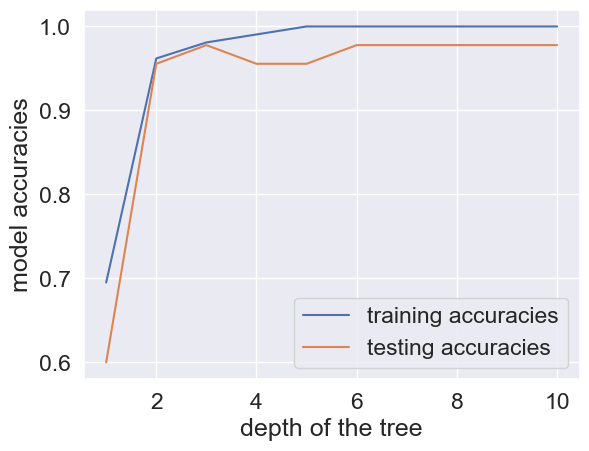

In [18]:
plt.plot(max_depths, train_acc, label='training accuracies')
plt.plot(max_depths, test_acc,  label='testing accuracies')
plt.xlabel('depth of the tree')
plt.ylabel('model accuracies')
           
plt.legend();

#### max_features

In [ ]:
max_features_settings = [None, 'log2', 'sqrt']